In [1]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from IPython import display
import d2l
from utils import mnist_reader
batch_size = 256
def load_data_fashion_mnist(batch_size, resize=None):
    tkwargs1 = {"dtype":torch.float32}
    tkwargs2 = {"dtype":torch.int64}
    train_images, train_labels = mnist_reader.load_mnist('data/fashion', kind='train')
    test_images, test_labels = mnist_reader.load_mnist('data/fashion', kind='t10k')
    # Scale images to the [0, 1] range
    train_images = train_images.astype("float32") / 255
    test_images = test_images.astype("float32") / 255
    train_x = torch.tensor(train_images, **tkwargs1).detach().reshape([-1, 28, 28])
    test_x = torch.tensor(test_images, **tkwargs1).detach().reshape([-1, 28, 28])
    train_y = torch.tensor(train_labels, **tkwargs2).detach()
    test_y = torch.tensor(test_labels, **tkwargs2).detach()
    trainset = TensorDataset(train_x, train_y)
    testset = TensorDataset(test_x, test_y)
    train_item =DataLoader(trainset,batch_size,shuffle=True, num_workers=0, drop_last=False)
    test_item = DataLoader(testset,batch_size,shuffle=True, num_workers=0, drop_last=False)
    return train_item,test_item

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

C:\Users\SF230210\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\SF230210\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [4]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [5]:
loss = nn.CrossEntropyLoss()

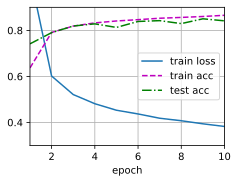

In [6]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

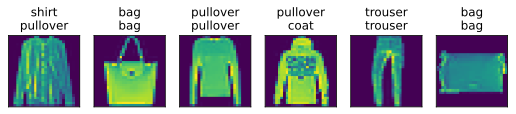

In [7]:
d2l.predict_ch3(net, test_iter)